<a href="https://colab.research.google.com/github/schineiderr/SurveyStackOverflow/blob/main/DS_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho de Introdução à Análise de Dados**

*   Dados: Stack Overflow Annual Developer Survey 2022
*   Fonte: https://www.kaggle.com/datasets/dheemanthbhat/stack-overflow-annual-developer-survey-2022

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise geral dos dados

* Nessa parte faço uma análise completa de todos os dados sem nenhuma remoção ou tratamento.

In [2]:
path = '/content/drive/MyDrive/Engenharia UFES/1 - Engenharia de Produção/8_sem/Introdução à Análise de Dados/Trabalho Samuel/'
df = pd.read_csv(path+'survey_results_public.csv')

In [3]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
df.shape

(73268, 79)

In [5]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [7]:
lista_colunas = []
lista_vals = []
for coluna in df.columns:
  lista_colunas.append(coluna)
  lista_vals.append(df[f'{coluna}'].isnull().sum())

df_vals = pd.DataFrame({'Variável': lista_colunas,
                        'Valores Nulos': lista_vals})

In [8]:
df_vals.to_excel(path+'quantidade de valores nulos.xlsx')

In [9]:
schema = pd.read_csv(path+'survey_results_schema.csv')

In [10]:
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
...,...,...,...,...,...,...
61,QID286,SOTeamsUsage,Does your team use Stack Overflow for Teams?,False,MC,SAVR
62,QID294,TrueFalse,Last few questions...,False,Matrix,Likert
63,QID131,S7,"<span style=""font-size:22px;""><strong>Final Qu...",False,DB,TB
64,QID132,SurveyLength,How do you feel about the length of the survey...,False,MC,MAVR


In [11]:
count = 1
for i in schema.index:
  if schema['type'][i] == 'MC':
    print(f"{count}. {schema['question'][i]}\n")
    count = count + 1

1. Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>

2. Which of the following best describes your current employment status?

3. Which best describes your current work situation?

4. Which of the following best describes the code you write outside of work? Select all that apply.

5. Which of the following best describes the highest level of formal education that you’ve completed? *

6. How did you learn to code? Select all that apply.

7. What online resources do you use to learn to code? Select all that apply.

8. What online courses or certifications do you use to learn to code? Select all that apply.

9. Including any education, how many years have you been coding in total?

10. NOT including education, how many years have you coded professionally (as a part of your work)?

11. Which of the following describes your current job? Please select all that apply.

12. Approximately how many people are employed by th

In [12]:
df.shape, schema.shape

((73268, 79), (66, 6))

In [13]:
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [14]:
df.groupby(['MainBranch']).size()

MainBranch
I am a developer by profession                                                   53507
I am learning to code                                                             6309
I am not primarily a developer, but I write code sometimes as part of my work     5794
I code primarily as a hobby                                                       4865
I used to be a developer by profession, but no longer am                          1296
None of these                                                                     1497
dtype: int64

In [15]:
for coluna in df.columns:
  
  
  for i in schema.index:
    if schema['qname'][i] == str(coluna):
      pergunta = schema['question'][i]
    else:
      pergunta = ''    

  print("\n\nColuna: ", df.groupby([f'{coluna}']).size(),
        "\nTipo: ", df[f'{coluna}'].dtype,
        "Pergunta: ", pergunta)



Coluna:  ResponseId
1        1
2        1
3        1
4        1
5        1
        ..
73264    1
73265    1
73266    1
73267    1
73268    1
Length: 73268, dtype: int64 
Tipo:  int64 Pergunta:  


Coluna:  MainBranch
I am a developer by profession                                                   53507
I am learning to code                                                             6309
I am not primarily a developer, but I write code sometimes as part of my work     5794
I code primarily as a hobby                                                       4865
I used to be a developer by profession, but no longer am                          1296
None of these                                                                     1497
dtype: int64 
Tipo:  object Pergunta:  


Coluna:  Employment
Employed, full-time                                                                                                                                  42962
Employed, full-time;Employed, part-time   

In [16]:
# Separacao das categorias por ';' e armazenagem numa lista
# Ideia eh criar colunas separadas para cada categoria

for coluna in df.columns:

  lista_categorias = []

  for linha in range(len(df[f'{coluna}'])):
    
    try:
      categ = df[f'{coluna}'][linha].split(';')
    except:
      categ = []

    for item in categ:
      if not item in lista_categorias:
        lista_categorias.append(item)
  
  #print(lista_categorias)
  #for categ in lista_categorias:
  #  try:
  #    df[f'{coluna}_{categ}'] = df[f'{coluna}'].apply(lambda value: 1
  #                                                    if categ in value else 0)
  #  except Exception as e:
  #    print(e)
  #    continue

    
  #print(f"Categorias de {coluna}: ", lista_categorias)

In [17]:
df.groupby('Age').size()

Age
18-24 years old       16646
25-34 years old       28112
35-44 years old       13988
45-54 years old        5281
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Under 18 years old     3866
dtype: int64

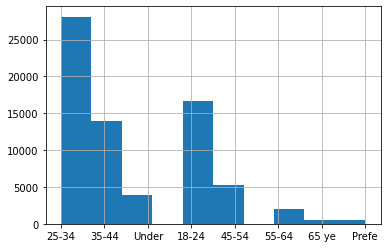

In [18]:
df['Age_Format'] = df['Age'].str[:5]
df.Age_Format.hist()

In [19]:
# Análise de Correlação das colunas
# Nao funciona para dados categóricos
# preciso transformar para numéricos primeiro
"""
f, ax = plt.subplots(figsize=(10,6))
correlacao = df.corr()
sns.heatmap(correlacao, annot=True)
plt.show()
"""

'\nf, ax = plt.subplots(figsize=(10,6))\ncorrelacao = df.corr()\nsns.heatmap(correlacao, annot=True)\nplt.show()\n'

In [20]:
# Utilizando do label encoder para transformacao das colunas

import numpy as np
from sklearn.preprocessing import LabelEncoder

#Criando a classe 
lb = LabelEncoder()

# Separando apenas as colunas que são do tipo 'object', ou seja, textos
# Os numéricos não precisam ser decodificados
Lista_Objetos = df.select_dtypes(include = "object").columns

# Cria uma cópia com apenas os dados que são objetos e 
# transformar elas em string
df_categorizado = pd.DataFrame()
for item in Lista_Objetos:
    df_categorizado[item] = lb.fit_transform(df[item].astype(str))

In [21]:
df_categorizado.head(10)

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,Age_Format
0,5,103,3,63,9,737,7192,206,52,52,...,5,5,5,155,2,2,2,3,3,8
1,0,0,1,36,9,737,7192,206,52,52,...,5,5,5,155,2,2,2,1,0,8
2,2,0,2,27,2,97,2398,206,5,44,...,5,5,5,155,2,2,2,0,2,1
3,0,0,1,59,1,339,7192,206,12,8,...,5,5,5,155,2,2,2,0,1,2
4,0,0,2,27,1,653,3204,206,48,22,...,5,5,5,155,2,2,2,1,1,1
5,2,63,3,63,2,339,7192,206,6,52,...,5,5,5,155,2,2,2,0,1,1
6,3,86,3,63,6,590,1491,206,22,52,...,5,5,5,155,2,2,2,0,1,7
7,0,53,3,63,7,576,7192,68,0,52,...,5,5,5,155,2,2,2,0,1,0
8,0,0,2,59,2,555,7192,206,46,46,...,0,4,1,96,1,1,1,0,1,1
9,0,44,1,37,7,283,4237,206,30,23,...,5,5,5,155,2,2,2,0,1,3


In [22]:
df_categorizado.shape

(73268, 74)

In [23]:
# Análise de Correlação das colunas
# Nao funciona para dados categóricos
# preciso transformar para numéricos primeiro

#Aqui já está transformado para numeros
"""
f, ax = plt.subplots(figsize=(18,12))

correlacao = df_categorizado.corr()
sns.heatmap(correlacao, annot=True)
plt.show()
"""

'\nf, ax = plt.subplots(figsize=(18,12))\n\ncorrelacao = df_categorizado.corr()\nsns.heatmap(correlacao, annot=True)\nplt.show()\n'

In [24]:
#f.savefig(path+'heatmap-correlacao.pdf')

In [25]:
"""
f, ax = plt.subplots(figsize=(12,8))
trecho = df_categorizado.filter(items=['Knowledge_1',
                                       'Knowledge_2',
                                       'Knowledge_3',
                                       'Knowledge_4',
                                       'Knowledge_5',
                                       'Knowledge_6',
                                       'Knowledge_7',
                                       'Frequency_1',
                                       'Frequency_2',
                                       'Frequency_3',
                                       'TimeSearching',
                                       'Onboarding',
                                       'ProfessionalTech',
                                       'TrueFalse_1',
                                       'TrueFalse_2',
                                       'TrueFalse_3'])
correlacao = trecho.corr()
sns.heatmap(correlacao, annot=True)
plt.show()
"""

"\nf, ax = plt.subplots(figsize=(12,8))\ntrecho = df_categorizado.filter(items=['Knowledge_1',\n                                       'Knowledge_2',\n                                       'Knowledge_3',\n                                       'Knowledge_4',\n                                       'Knowledge_5',\n                                       'Knowledge_6',\n                                       'Knowledge_7',\n                                       'Frequency_1',\n                                       'Frequency_2',\n                                       'Frequency_3',\n                                       'TimeSearching',\n                                       'Onboarding',\n                                       'ProfessionalTech',\n                                       'TrueFalse_1',\n                                       'TrueFalse_2',\n                                       'TrueFalse_3'])\ncorrelacao = trecho.corr()\nsns.heatmap(correlacao, annot=True)\nplt.sho

# Seleção das Variáveis

* Daqui pra baixo farei uma seleção das colunas e trata-las separadamente

In [26]:
### Criar novo data frame filtrado com as colunas que quero observar

# Numero de colunas: = 20

# Vou fazer o tratamento de cada uma delas para conseguir categorizar
# com a biblioteca LabelEncoder e salvar num dataframe chamado 'novo_df'

colunas_selecionadas = ['MainBranch', 'RemoteWork', 'EdLevel', 'PurchaseInfluence',
                        'YearsCode', 'Country', 'Age', 'MentalHealth', 
                        'WorkExp', 'TBranch', 'ICorPM', 'Knowledge_1',
                        'Frequency_1', 'TimeSearching', 'TimeAnswering', 'Onboarding',
                        'TrueFalse_1', 'TrueFalse_2', 'TrueFalse_3', 'ConvertedCompYearly']

df_filtrado = df.filter(items=colunas_selecionadas)

novo_df = pd.DataFrame()

In [27]:
for i in schema.index:
  if schema['qname'][i] in colunas_selecionadas:
    print(f"{schema['qname'][i]}: {schema['question'][i]}")

MainBranch: Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>
RemoteWork: Which best describes your current work situation?
EdLevel: Which of the following best describes the highest level of formal education that you’ve completed? *
YearsCode: Including any education, how many years have you been coding in total?
PurchaseInfluence: What level of influence do you, personally, have over new technology purchases at your organization?
Country: Where do you live? <span style="font-weight: bolder;">*</span>
Age: What is your age?
MentalHealth: Which of the following describe you, if any? Please check all that apply. 
TBranch: <span style="font-size:16px;">Would you like to participate in the Professional Developer Series?</span>
ICorPM: Are you an independent contributor or people manager?
WorkExp: How many years of working experience do you have?
TimeSearching: On an average day, how much time do you typically spend se

## Colunas 1 a 4: 
* MainBranch
* RemoteWork
* EdLevel
* PurchaseInfluence

Essas colunas não precisam de tratamento e já tem suas categorias bem definidas,
podemos passar o LabelEncoder sem problemas.

In [28]:
df_filtrado.groupby(['MainBranch']).size()

MainBranch
I am a developer by profession                                                   53507
I am learning to code                                                             6309
I am not primarily a developer, but I write code sometimes as part of my work     5794
I code primarily as a hobby                                                       4865
I used to be a developer by profession, but no longer am                          1296
None of these                                                                     1497
dtype: int64

In [29]:
df_filtrado.groupby(['RemoteWork']).size()

RemoteWork
Full in-person                           8596
Fully remote                            25341
Hybrid (some remote, some in-person)    25021
dtype: int64

In [30]:
df_filtrado.groupby(['EdLevel']).size()

EdLevel
Associate degree (A.A., A.S., etc.)                                                    2236
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Professional degree (JD, MD, etc.)                                                     1121
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Some college/university study without earning a degree                                 9326
Something else                                                                         1247
dtype: int64

In [31]:
df_filtrado.groupby(['PurchaseInfluence']).size()

PurchaseInfluence
I have a great deal of influence    11633
I have little or no influence       17345
I have some influence               21991
dtype: int64

In [32]:
novo_df['MainBranch'] = df_filtrado['MainBranch']
novo_df['RemoteWork'] = df_filtrado['RemoteWork']
novo_df['EdLevel'] = df_filtrado['EdLevel']
novo_df['PurchaseInfluence'] = df_filtrado['PurchaseInfluence']

In [33]:
novo_df.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence
0,None of these,NaN,NaN,NaN
1,I am a developer by profession,Fully remote,NaN,NaN
2,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I have some influence
3,I am a developer by profession,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence
4,I am a developer by profession,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence


## Coluna 5: YearsCode

Essa coluna está como 'object' que é a string do pandas, e precisa ser passada para valores inteiros. Quantos aos valores que estão sem numeros nas respostas, serão substituidos por sem resposta.

In [34]:
df_filtrado.groupby(['YearsCode']).size()

YearsCode
1                     1566
10                    5217
11                    1819
12                    2995
13                    1624
14                    1811
15                    2962
16                    1406
17                    1080
18                    1150
19                     563
2                     3351
20                    2659
21                     483
22                    1176
23                     644
24                     752
25                    1582
26                     489
27                     485
28                     425
29                     208
3                     4122
30                    1330
31                     170
32                     371
33                     229
34                     241
35                     742
36                     236
37                     277
38                     288
39                     159
4                     4480
40                     777
41                     143
42                

In [35]:
novo_df['YearsCode'] = pd.to_numeric(df_filtrado.YearsCode, errors='coerce')

## Coluna 6 e 7

* Country
* Age

Nessas colunas farei o mesmo procedimento que nas colunas 1 e 4, já estão categorizadas corretamente.

Eu poderia fazer uma separação da coluna age para poder tornar os numeros inteiros, porem como esta em forma de interval a respsota da pesquisa não faz muito sentido essa separação, portanto ficara como está.

In [36]:
df_filtrado.groupby(['Country']).size()

Country
Afghanistan                              69
Albania                                  59
Algeria                                  36
Andorra                                  15
Angola                                   12
                                       ... 
Venezuela, Bolivarian Republic of...    119
Viet Nam                                317
Yemen                                    14
Zambia                                   20
Zimbabwe                                 30
Length: 180, dtype: int64

In [37]:
df_filtrado.groupby(['Age']).size()

Age
18-24 years old       16646
25-34 years old       28112
35-44 years old       13988
45-54 years old        5281
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Under 18 years old     3866
dtype: int64

In [38]:
novo_df['Country'] = df_filtrado['Country']
novo_df['Age'] = df_filtrado['Age']

In [39]:
novo_df.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,YearsCode,Country,Age
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,Fully remote,NaN,NaN,NaN,Canada,NaN
2,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I have some influence,14.0,United Kingdom of Great Britain and Northern I...,25-34 years old
3,I am a developer by profession,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,20.0,Israel,35-44 years old
4,I am a developer by profession,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,8.0,United States of America,25-34 years old


## Coluna 8: MentalHealth

Nesta coluna precisaremos separar os dados em várias colunas pois a pergunta é no formato de caixas de seleção. Podendo cada entrevistado selecionar mais de uma opcao, causando diversas combinações.

In [40]:
df_filtrado.groupby(['MentalHealth']).size()

MentalHealth
I have a concentration and/or memory disorder (e.g., ADHD, etc.)                                                                                                                                                                                                                                                                       2936
I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)                                                                                                                                                                                                    427
I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have learning differences (e.g., Dyslexic, Dyslexia, etc.)                                                                                                                                                                                                      

In [41]:
# Criação de uma lista com todas as categorias possíveis

lista_categorias = []

for linha in range(len(df['MentalHealth'])):
  try:
    categ = df['MentalHealth'][linha].split(';')
  except:
    categ = []

  for item in categ:
    if not item in lista_categorias:
      lista_categorias.append(item)

print(lista_categorias)

['I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)', 'I have an anxiety disorder', 'None of the above', 'Or, in your own words:', 'I have a concentration and/or memory disorder (e.g., ADHD, etc.)', 'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)', "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)", 'Prefer not to say']


In [42]:
x = 0
for i in lista_categorias:
  print(f"MentalHealth_{x}: {i}")
  x +=1

MentalHealth_0: I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)
MentalHealth_1: I have an anxiety disorder
MentalHealth_2: None of the above
MentalHealth_3: Or, in your own words:
MentalHealth_4: I have a concentration and/or memory disorder (e.g., ADHD, etc.)
MentalHealth_5: I have learning differences (e.g., Dyslexic, Dyslexia, etc.)
MentalHealth_6: I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)
MentalHealth_7: Prefer not to say


In [43]:
mh = df_filtrado['MentalHealth'].dropna()

In [44]:
mh.shape

(66447,)

In [45]:
# Criacao das colunas contendo 1 ou 0 caso a pessoa tenha marcado a caixinha
# contendo a categoria que está na lista 'lista_categorias'

count = 0
for categ in lista_categorias:
  
  try:
    novo_df[f'MentalHealth_{count}'] = mh.apply(lambda value: True
                                                if categ in value
                                                else False)
  except Exception as e:
    print(e)
    continue
  count += 1  

In [46]:
novo_df.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,YearsCode,Country,Age,MentalHealth_0,MentalHealth_1,MentalHealth_2,MentalHealth_3,MentalHealth_4,MentalHealth_5,MentalHealth_6,MentalHealth_7
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,Fully remote,NaN,NaN,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I have some influence,14.0,United Kingdom of Great Britain and Northern I...,25-34 years old,True,True,False,False,False,False,False,False
3,I am a developer by profession,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,20.0,Israel,35-44 years old,False,False,True,False,False,False,False,False
4,I am a developer by profession,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,8.0,United States of America,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Colunas 9: WorkExp

Nesta coluna também não há necessidade de tratamentos de dados.

In [47]:
df_filtrado['WorkExp'].dtype

dtype('float64')

In [48]:
novo_df['WorkExp'] = df_filtrado['WorkExp']

In [49]:
novo_df.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,YearsCode,Country,Age,MentalHealth_0,MentalHealth_1,MentalHealth_2,MentalHealth_3,MentalHealth_4,MentalHealth_5,MentalHealth_6,MentalHealth_7,WorkExp
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,Fully remote,NaN,NaN,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I have some influence,14.0,United Kingdom of Great Britain and Northern I...,25-34 years old,True,True,False,False,False,False,False,False,NaN
3,I am a developer by profession,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,20.0,Israel,35-44 years old,False,False,True,False,False,False,False,False,NaN
4,I am a developer by profession,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,8.0,United States of America,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
novo_df.dtypes

MainBranch            object
RemoteWork            object
EdLevel               object
PurchaseInfluence     object
YearsCode            float64
Country               object
Age                   object
MentalHealth_0        object
MentalHealth_1        object
MentalHealth_2        object
MentalHealth_3        object
MentalHealth_4        object
MentalHealth_5        object
MentalHealth_6        object
MentalHealth_7        object
WorkExp              float64
dtype: object

## Coluna 10 em diante

* Aqui já podemos também categorizar diretamente...

In [51]:
novo_df[['TBranch', 'ICorPM', 'Knowledge_1',
         'Frequency_1', 'TimeSearching', 'TimeAnswering',
         'Onboarding', 'TrueFalse_1', 'TrueFalse_2',
         'TrueFalse_3', 'ConvertedCompYearly']] = df_filtrado[['TBranch', 'ICorPM', 'Knowledge_1',
                                                               'Frequency_1', 'TimeSearching', 'TimeAnswering',
                                                               'Onboarding', 'TrueFalse_1', 'TrueFalse_2',
                                                               'TrueFalse_3', 'ConvertedCompYearly']]

In [52]:
novo_df.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,YearsCode,Country,Age,MentalHealth_0,MentalHealth_1,MentalHealth_2,...,ICorPM,Knowledge_1,Frequency_1,TimeSearching,TimeAnswering,Onboarding,TrueFalse_1,TrueFalse_2,TrueFalse_3,ConvertedCompYearly
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,Fully remote,NaN,NaN,NaN,Canada,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I have some influence,14.0,United Kingdom of Great Britain and Northern I...,25-34 years old,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40205.0
3,I am a developer by profession,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,20.0,Israel,35-44 years old,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215232.0
4,I am a developer by profession,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,8.0,United States of America,25-34 years old,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
novo_df.dtypes

MainBranch              object
RemoteWork              object
EdLevel                 object
PurchaseInfluence       object
YearsCode              float64
Country                 object
Age                     object
MentalHealth_0          object
MentalHealth_1          object
MentalHealth_2          object
MentalHealth_3          object
MentalHealth_4          object
MentalHealth_5          object
MentalHealth_6          object
MentalHealth_7          object
WorkExp                float64
TBranch                 object
ICorPM                  object
Knowledge_1             object
Frequency_1             object
TimeSearching           object
TimeAnswering           object
Onboarding              object
TrueFalse_1             object
TrueFalse_2             object
TrueFalse_3             object
ConvertedCompYearly    float64
dtype: object

# Limpeza e Discretizacao

* Primeiro vou tirar todos as linhas que não foram preenchidas em alguma das minhas respostas de interesse. Como o volume de dados é grande e preciso de todas as respostas, e além disso algumas perguntas tem a possibilidade de não serem respondidas, posso remover as linhas com valores nulos.

* Feito isso, já posso discretizar meu dataframe.

In [54]:
# Antes de remover os valores nulos, irei preencher com 0's os valores das 
# colunas MentalHealth, pois é a unica no formato de "Caixas de Seleção"

novo_df[['MentalHealth_0',
         'MentalHealth_1',
         'MentalHealth_2',
         'MentalHealth_3',
         'MentalHealth_4',
         'MentalHealth_5',
         'MentalHealth_6',
         'MentalHealth_7']] = novo_df[['MentalHealth_0',
                                       'MentalHealth_1',
                                       'MentalHealth_2',
                                       'MentalHealth_3',
                                       'MentalHealth_4',
                                       'MentalHealth_5',
                                       'MentalHealth_6',
                                       'MentalHealth_7']].fillna(value=False)

In [55]:
novo_df.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,YearsCode,Country,Age,MentalHealth_0,MentalHealth_1,MentalHealth_2,...,ICorPM,Knowledge_1,Frequency_1,TimeSearching,TimeAnswering,Onboarding,TrueFalse_1,TrueFalse_2,TrueFalse_3,ConvertedCompYearly
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,Fully remote,NaN,NaN,NaN,Canada,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I have some influence,14.0,United Kingdom of Great Britain and Northern I...,25-34 years old,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40205.0
3,I am a developer by profession,Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,20.0,Israel,35-44 years old,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215232.0
4,I am a developer by profession,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I have some influence,8.0,United States of America,25-34 years old,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
novo_df.shape

(73268, 27)

In [57]:
df_notnull = novo_df.dropna()

In [58]:
df_notnull.shape

(24988, 27)

In [59]:
# Celular para verificar as perguntas que selecionei com os seus
# respectivos nomes 

count = 1
for i in schema.index:
  #print(schema['qname'][i])
  if schema['qname'][i] in colunas_selecionadas:
    print(f"{count}. {schema['qname'][i]}: {schema['question'][i]}\n")
    count += 1
  else:
    count += 1

4. MainBranch: Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>

6. RemoteWork: Which best describes your current work situation?

9. EdLevel: Which of the following best describes the highest level of formal education that you’ve completed? *

13. YearsCode: Including any education, how many years have you been coding in total?

17. PurchaseInfluence: What level of influence do you, personally, have over new technology purchases at your organization?

19. Country: Where do you live? <span style="font-weight: bolder;">*</span>

45. Age: What is your age?

51. MentalHealth: Which of the following describe you, if any? Please check all that apply. 

53. TBranch: <span style="font-size:16px;">Would you like to participate in the Professional Developer Series?</span>

54. ICorPM: Are you an independent contributor or people manager?

55. WorkExp: How many years of working experience do you have?

58. TimeSearching: On

In [60]:
# Utilizando do label encoder para transformacao das colunas

import numpy as np
from sklearn.preprocessing import LabelEncoder

#Criando a classe 
lb = LabelEncoder()

# Separando apenas as colunas que são do tipo 'object', ou seja, textos
# Os numéricos não precisam ser decodificados
Lista_Objetos = df_notnull.select_dtypes(include = "object").columns

# Cria uma cópia com apenas os dados que são objetos e 
# transformar elas em string
df_categorizado = pd.DataFrame()
for item in Lista_Objetos:
    df_categorizado[item] = lb.fit_transform(df_notnull[item].astype(str))

In [61]:
df_categorizado.shape

(24988, 16)

In [62]:
df_categorizado.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,Country,Age,TBranch,ICorPM,Knowledge_1,Frequency_1,TimeSearching,TimeAnswering,Onboarding,TrueFalse_1,TrueFalse_2,TrueFalse_3
0,0,2,2,1,93,1,0,0,0,2,0,4,1,1,1,1
1,1,1,1,2,147,2,0,1,3,1,1,2,0,1,1,0
2,0,2,1,0,147,1,0,0,2,4,1,3,2,1,0,1
3,0,1,2,1,147,1,0,0,0,0,1,1,1,0,1,1
4,0,2,2,2,64,1,0,0,0,0,1,2,1,1,0,0


In [63]:
# Ate aqui apenas categorizei as colunas do tipo object
# Agora falta inserir as colunas que não foram categorizadas, as do tipo float

df_notnull.dtypes

MainBranch              object
RemoteWork              object
EdLevel                 object
PurchaseInfluence       object
YearsCode              float64
Country                 object
Age                     object
MentalHealth_0            bool
MentalHealth_1            bool
MentalHealth_2            bool
MentalHealth_3            bool
MentalHealth_4            bool
MentalHealth_5            bool
MentalHealth_6            bool
MentalHealth_7            bool
WorkExp                float64
TBranch                 object
ICorPM                  object
Knowledge_1             object
Frequency_1             object
TimeSearching           object
TimeAnswering           object
Onboarding              object
TrueFalse_1             object
TrueFalse_2             object
TrueFalse_3             object
ConvertedCompYearly    float64
dtype: object

In [64]:
# Incluir as colunas floats pois só foram tratadas as 'objects'
Lista_Float = df_notnull.select_dtypes(include = "float64").columns
for item in Lista_Float:
    df_categorizado[item] = df_notnull[item]

# Incluir as colunas bool pois só foram tratadas as 'objects'
Lista_Float = df_notnull.select_dtypes(include = "bool").columns
for item in Lista_Float:
    df_categorizado[item] = df_notnull[item]

In [65]:
df_categorizado.shape

(24988, 27)

In [66]:
df_categorizado.head()

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,Country,Age,TBranch,ICorPM,Knowledge_1,Frequency_1,...,WorkExp,ConvertedCompYearly,MentalHealth_0,MentalHealth_1,MentalHealth_2,MentalHealth_3,MentalHealth_4,MentalHealth_5,MentalHealth_6,MentalHealth_7
0,0,2,2,1,93,1,0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,2,147,2,0,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,1,0,147,1,0,0,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,2,1,147,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2,2,2,64,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_cat_notnull = df_categorizado.dropna()
df_cat_notnull

,MainBranch,RemoteWork,EdLevel,PurchaseInfluence,Country,Age,TBranch,ICorPM,Knowledge_1,Frequency_1,...,WorkExp,ConvertedCompYearly,MentalHealth_0,MentalHealth_1,MentalHealth_2,MentalHealth_3,MentalHealth_4,MentalHealth_5,MentalHealth_6,MentalHealth_7
8,0,1,2,0,61,3,0,0,3,0,...,6.0,49056.0,False,False,False,True,False,False,False,False
11,0,2,2,1,79,1,0,0,3,0,...,14.0,194400.0,True,False,False,False,False,False,False,False
12,0,1,1,1,147,1,0,0,3,0,...,5.0,65000.0,False,False,True,False,False,False,False,False
14,0,2,1,2,107,1,0,0,0,0,...,5.0,110000.0,False,False,True,False,False,False,False,False
21,0,1,1,0,23,1,0,0,0,0,...,4.0,34126.0,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24960,0,2,6,0,145,1,0,0,3,1,...,3.0,29412.0,False,False,True,False,False,False,False,False
24970,0,1,7,1,147,2,0,0,0,0,...,4.0,74651.0,True,False,False,False,True,False,False,False
24971,0,1,1,1,112,2,0,0,4,4,...,4.0,54168.0,False,False,True,False,False,False,False,False
24973,0,1,2,0,20,2,0,1,0,4,...,18.0,124103.0,True,False,False,False,True,False,True,False


In [68]:
df_clean = df_cat_notnull.loc[df_cat_notnull['MentalHealth_2'] == False]

In [69]:
df_clean.shape

(2586, 27)

In [70]:
print(df_cat_notnull.head(10).to_markdown())

|    |   MainBranch |   RemoteWork |   EdLevel |   PurchaseInfluence |   Country |   Age |   TBranch |   ICorPM |   Knowledge_1 |   Frequency_1 |   TimeSearching |   TimeAnswering |   Onboarding |   TrueFalse_1 |   TrueFalse_2 |   TrueFalse_3 |   YearsCode |   WorkExp |   ConvertedCompYearly | MentalHealth_0   | MentalHealth_1   | MentalHealth_2   | MentalHealth_3   | MentalHealth_4   | MentalHealth_5   | MentalHealth_6   | MentalHealth_7   |
|---:|-------------:|-------------:|----------:|--------------------:|----------:|------:|----------:|---------:|--------------:|--------------:|----------------:|----------------:|-------------:|--------------:|--------------:|--------------:|------------:|----------:|----------------------:|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|
|  8 |            0 |            1 |         2 |                   0 |        61 |     3 |         0 |    

# Análises

* Com os dados categorizados, já podemos fazer as aplicações das técnicas de predição.

###  Importacao das bibliotecas

In [71]:
# Tratamento
from sklearn.preprocessing import StandardScaler
# Separacao dos dados de teste e treino
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Validacao
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Rede neural MultiLayer Perceptron
from sklearn.neural_network import MLPClassifier
# Maquina de Vetores de Suporte
from sklearn.svm import SVC

### Preparacao dos dados de treino e teste

In [72]:
df_final = df_clean.reset_index(drop=True)

# Separacao das variaveis em atributos previsores (X) e atributo alvo (Y)

X = df_final.drop('MentalHealth_0', axis=1)
y = df_final['MentalHealth_0'].astype('bool')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

### Naive Bayes

In [74]:
df_cat_notnull.dtypes

MainBranch               int64
RemoteWork               int64
EdLevel                  int64
PurchaseInfluence        int64
Country                  int64
Age                      int64
TBranch                  int64
ICorPM                   int64
Knowledge_1              int64
Frequency_1              int64
TimeSearching            int64
TimeAnswering            int64
Onboarding               int64
TrueFalse_1              int64
TrueFalse_2              int64
TrueFalse_3              int64
YearsCode              float64
WorkExp                float64
ConvertedCompYearly    float64
MentalHealth_0          object
MentalHealth_1          object
MentalHealth_2          object
MentalHealth_3          object
MentalHealth_4          object
MentalHealth_5          object
MentalHealth_6          object
MentalHealth_7          object
dtype: object

In [75]:
clf = MultinomialNB()

**Scores sem utilizar o K-Fold**

In [76]:
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

for s in scores:
  print(f"Score: {s}")
print(f"\nAcurácia MultinomialNB: {100*scores.mean():.2f}%")

Score: 0.5347490347490348
Score: 0.6518375241779497
Score: 0.6595744680851063
Score: 0.6150870406189555
Score: 0.6054158607350096

Acurácia MultinomialNB: 61.33%


**Scores utilizando o K-Fold**

In [77]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)

for s in score:
  print(f"Score: {s}")
print(f"\nAcurácia MultinomialNB: {100*score.mean():.2f}%")

Score: 0.38996138996138996
Score: 0.5868725868725869
Score: 0.640926640926641
Score: 0.6177606177606177
Score: 0.6486486486486487
Score: 0.6563706563706564
Score: 0.6395348837209303
Score: 0.6317829457364341
Score: 0.5968992248062015
Score: 0.627906976744186

Acurácia MultinomialNB: 60.37%


### Redes Neurais

In [78]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [79]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [80]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300, activation = 'relu', solver='adam', random_state=23)

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

cm = confusion_matrix(y_preds, y_test)
print("Acurácia MLPClassifier : ", accuracy(cm))

Acurácia MLPClassifier :  0.6621621621621622


In [81]:
len(y_test), y_test.sum(), y_test.sum()/len(y_test)

(518, 152, 0.29343629343629346)

In [82]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300, activation = 'relu', solver='adam', random_state=23)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)

for s in score:
  print(f"Score: {s}")
print(f"\nAcurácia MLPClassifier: {100*score.mean():.2f}%")

Score: 0.3166023166023166
Score: 0.6718146718146718
Score: 0.6447876447876448
Score: 0.6447876447876448
Score: 0.6911196911196911
Score: 0.6872586872586872
Score: 0.3449612403100775
Score: 0.34108527131782945
Score: 0.3682170542635659
Score: 0.6550387596899225

Acurácia MLPClassifier: 53.66%


In [83]:
len(df_final), df_final['MentalHealth_0'].sum()

(2586, 865)

### Máquinas de Vetores de Suporte

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [85]:
svm = SVC(C=1, gamma='scale', kernel='linear', max_iter=10000, random_state=200)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', max_iter=10000, random_state=200)

In [86]:
y_pred = svm.predict(X_test)

In [87]:
cm = confusion_matrix(y_pred, y_test)

print(cm)

print(f"Acurácia SVC com kernel Linear: {accuracy(cm)*100:.2f}%")

[[366 152]
 [  0   0]]
Acurácia SVC com kernel Linear: 70.66%


In [88]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=23)
scoring = 'accuracy'
score = cross_val_score(svm, X, y, cv=k_fold, n_jobs=1, scoring=scoring)

for s in score:
  print(f"Score: {s}")
print(f"\nAcurácia SVC com Kernel Linear: {100*score.mean():.2f}%")

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider

Score: 0.29343629343629346
Score: 0.30115830115830117
Score: 0.6447876447876448
Score: 0.6332046332046332
Score: 0.3590733590733591
Score: 0.3204633204633205
Score: 0.38372093023255816
Score: 0.6395348837209303
Score: 0.36046511627906974
Score: 0.3023255813953488

Acurácia SVC com Kernel Linear: 42.38%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**Próximos passos**

* No relatório: 
  * Traduzir as perguntas
  * Atualizar tratamento dos dados (fiz mais remocoes - df_clean)
  * Atualizar naive bayes
